In [85]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import datasets
from pandas.plotting import scatter_matrix
import seaborn 
import statsmodels.api as sm

In [21]:
# https://scipy-lectures.org/packages/statistics/auto_examples/plot_iris_analysis.html
# https://svaditya.github.io/oldblog/chi_square_and_t_tests_on_iris_data.html
# https://rpubs.com/Tanzir/Statistical-Analysis_IRIS-Data
# https://www.kaggle.com/bhagyashree12/anova-test-on-iris-dataset
# https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/
# https://medium.com/analytics-vidhya/exploratory-data-analysis-iris-dataset-4df6f045cda

# About Dataset:
The iris flower data consists of 50 samples from 3 different species of iris flower namely setosa, versicolor and virginica. The dataset consists of 4 numerical/input features and 1 categorical feature/target variable. Input features are sepal length, sepal width, petal length and petal width whereas target variable is species.

In [191]:
iris = datasets.load_iris()

In [194]:
iris.target_names # encoding scheme for species : 0=setosa, 1=versicolor and 2=virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [195]:
X = iris.data
y = iris.target #integers representing the species

In [196]:
model=sm.OLS(y,X)
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1267.
Date:                Sun, 05 Dec 2021   Prob (F-statistic):                   3.17e-112
Time:                        02:26:48   Log-Likelihood:                          17.009
No. Observations:                 150   AIC:                                     -26.02
Df Residuals:                     146   BIC:                                     -13.98
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0845      0.049     -1.720      0.088      -0.182       0.013
x2            -0.0236      0.057     -0.415      0.679      -0.136       0.089
x3             0.2249      0.057      3.968      0.000       0.113       0.337
x4             0.5997      0.094      6.392      0.000       0.414       0.785
==============================================================================
Omnibus:                        0.384   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.128
Skew:                          -0.026   Prob(JB):                        0.938
Kurtosis:                       3.133   Cond. No.                         50.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
df_iris = pd.DataFrame(iris.data, columns=['sepalLength','sepalWidth','petalLength','petalWidth'])
df_iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [198]:
df2_iris = pd.DataFrame(iris.target, columns=['target'])
df2_iris.head()

,target
0,0
1,0
2,0
3,0
4,0


## Data Analysis and Visualization

In [199]:
iris = pd.concat([df_iris, df2_iris], axis=1)
iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [200]:
iris.describe()

,sepalLength,sepalWidth,petalLength,petalWidth,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


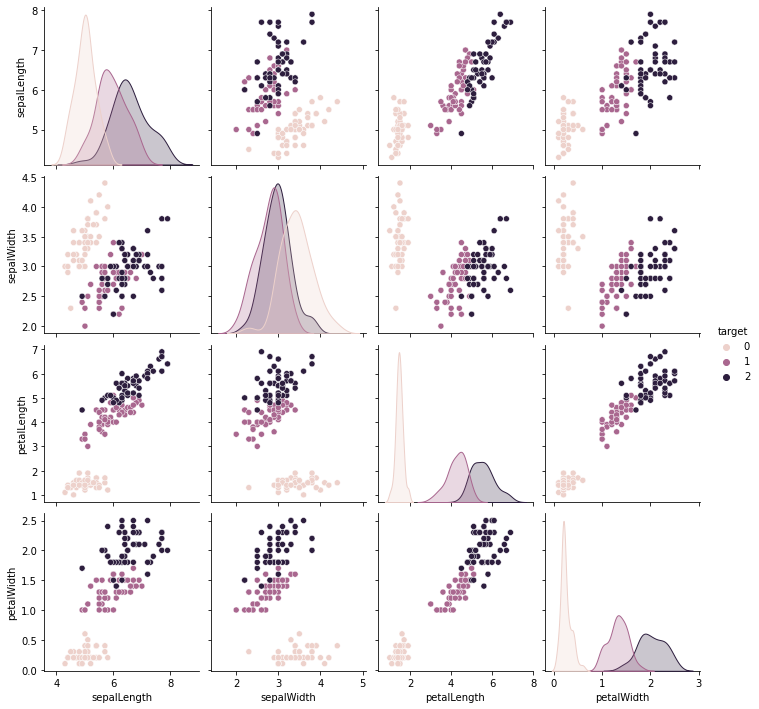

In [201]:
seaborn.pairplot(iris, hue="target")
plt.show()

From above we can infer:
1. The distributions show there is very less overlapping in the petal length and petal width, so we can take them as classification features.
2. There is a high correlation between petal length and petal width columns. We can look into the correlation more closely by plotting on a heatmap.

[]

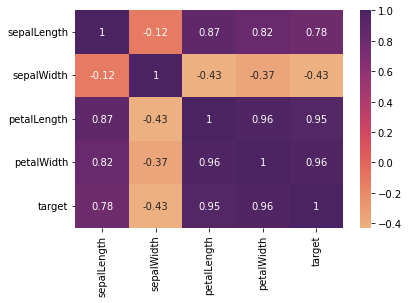

In [203]:
seaborn.heatmap(iris.corr(),annot=True,cmap='flare')
plt.plot()

High positive correlation between PetalWidth and PetalLength (0.96)

High positive correlation between PetalLength and SepalLength (0.87)

High positive correlation between PetalWidth and SepalLength (0.82)

# Check normal distribution of variables 

## Shapiro-Wilk test

Shapiro-Wilk test is a statistical test for normality. The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

***Null hypothesis:- data was drawn from normal distribution***

***Alternate hypothesis:- data was not drawn from normal distribution***

In [204]:
from scipy.stats import shapiro
for i in df_iris.columns:
    print(f'{i}: {"Not Gaussian: reject null hypothesis" if shapiro(df_iris[i])[1]<0.05 else "Gaussian: fail to reject null hypothesis"}  {shapiro(df_iris[i])}')

sepalLength: Not Gaussian: reject null hypothesis  ShapiroResult(statistic=0.9760897755622864, pvalue=0.01017984002828598)
sepalWidth: Gaussian: fail to reject null hypothesis  ShapiroResult(statistic=0.9849170446395874, pvalue=0.10113201290369034)
petalLength: Not Gaussian: reject null hypothesis  ShapiroResult(statistic=0.8762688040733337, pvalue=7.412849778454245e-10)
petalWidth: Not Gaussian: reject null hypothesis  ShapiroResult(statistic=0.9018339514732361, pvalue=1.6802413682626138e-08)


**Only variable 'sepalWidth' is a normal distribution.**

# T-test

***Null hypothesis:- 'sepalWidth' is not significant for identifying an iris flow species(target)***

***Alternate hypothesis:- 'sepalWidth' is significant for identifying an iris flow species(target)***

In [206]:
stats.ttest_ind(X[:,1],y) # Independent t-test - sepalWidth vs target

Ttest_indResult(statistic=27.15303402964298, pvalue=1.4182422887115277e-82)

**The Independent t-test results are significant because p-value is very small. So, we can reject the null hypothesis in support of the alternative hypothesis.**

### T-test of each feature vs target

***Null hypothesis:- Feature is not significant for identifying an iris flow species(target)***

***Alternate hypothesis:- Feature is significant for identifying an iris flow species(target)***

In [209]:
t_test,p=stats.ttest_ind(X,y)
p

array([4.39761393e-149, 1.41824229e-082, 4.03930219e-047, 2.99117550e-002])

In [219]:
for i in range(X.shape[1]):
    t_test,p=stats.ttest_ind(X[:,i],y) # every feature vs target
    if p>0.05:
        print(f"{i}: Not significant feature  (Fail to reject the null hypothesis)")
    else:
        print(f"{i}: Significant feature (Reject null hypothesis)")

0: Significant feature (Reject null hypothesis)
1: Significant feature (Reject null hypothesis)
2: Significant feature (Reject null hypothesis)
3: Significant feature (Reject null hypothesis)


**All input features (sepal length, sepal width, petal length and petal width) are statistically significant in identifying the target variable i.e species of iris flower.**

# Analysis of variance

### One-way ANOVA test
The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean.

***Null hypothesis:- 'sepalWidth' and iris flow species(target) have the same population mean***

***Alternate hypothesis:- 'sepalWidth' and iris flow species(target) don't have the same population mean***

In [223]:
stat,p=stats.f_oneway(X[:,1],y)
print(stat,p)

737.2872570149498 1.418242288711535e-82


In [228]:
alpha=0.05
if p>alpha:
    print("Fail to reject null hypothesis")
else:
    print("Reject null hypothesis")

Reject null hypothesis


### One-way ANOVA tests of each feature vs target

In [227]:
for i in range(X.shape[1]):
    t_test,p=stats.f_oneway(X[:,i],y)
    if p>alpha:
        print(f"{i}: Fail to reject null hypothesis")
    else:
        print(f"{i}: Reject null hypothesis")

0: Reject null hypothesis
1: Reject null hypothesis
2: Reject null hypothesis
3: Reject null hypothesis


# Chi-Squared Test